In [1]:
# test theoretical value for different 
# sigmaA sigmaB levels

from noisy_zsc.game import NoisyBailLeverGame
from noisy_zsc.heuristic_learner import ArgmaxAgent, Argmaxof2Agent, StubbornAgent, argmax_of_2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import random
from collections import deque
import pandas as pd
import csv
import seaborn as sns
from matplotlib import colors


In [2]:
# function: given sigma, sigma1, sigma2
# output value of argmax
# out of 1 million simulations

mean_payoffs = [5., 5., 5.]
bail_payoff = 5 # this can change

def argmax_score(payoffs1, payoffs2, true_payoff):
    
    payoffs1 = list(payoffs1)
    payoffs2 = list(payoffs2)

    action1 = np.argmax(payoffs1)
    action2 = np.argmax(payoffs2)
    if action1 == action2:
        return true_payoff[action1]
    else:
        return 0


def argmax_val(sigma, sigma1, sigma2, bail_payoff = bail_payoff, runs = 100000):
    val_list = []

    for i in range(runs):
        # init a run
        env = NoisyBailLeverGame(mean_payoffs, bail_payoff, sigma, sigma1, sigma2, episode_length=1)
        score = argmax_score(env.payoffs1, env.payoffs2, env.true_payoffs)
        val_list.append(score) 
    
    val = np.mean(val_list)
    return val


def argmax_of_2_score(payoffs1, payoffs2, true_payoff):
    
    payoffs1 = list(payoffs1)
    payoffs2 = list(payoffs2)

    action1 = np.argmax(payoffs1[1:])
    action2 = np.argmax(payoffs2[1:])
    if action1 == action2:
        return true_payoff[action1+1]
    else:
        return 0

def argmax_of_2_val(sigma, sigma1, sigma2, bail_payoff = bail_payoff, runs = 100000):
    val_list = []

    for i in range(runs):
        # init a run
        env = NoisyBailLeverGame(mean_payoffs, bail_payoff, sigma, sigma1, sigma2, episode_length=1)
        score = argmax_of_2_score(env.payoffs1, env.payoffs2, env.true_payoffs)
        val_list.append(score) 
    
    val = np.mean(val_list)
    return val


In [3]:
# fix sigma, create dataframe with columns sigma1, sigma2, value
sigma_list = [0, 1, 2,3,4,5,6,7, 8, 9, 10]
bail = 5
sigma = 5
sigma1_list = np.linspace(0, 10, 11)
sigma2_list = np.linspace(0, 10, 11)
mean_payoffs = [5., 5., 5.]

value_list = []
opt_pol = ''

df = pd.DataFrame(columns = ['sigma1', 'sigma2', 'opt_policy', 'idx'])
for sigma1 in sigma1_list:
    for sigma2 in sigma2_list:
        # argmax, argmax of 2, bail/stubborn
        value_list = [argmax_val(sigma, sigma1, sigma2, bail_payoff = bail), bail_payoff]
        if np.argmax(value_list) == 0:
            opt_pol = 'argmax'
            idx = 0
        else:
            opt_pol = 'bail / stubborn'
            idx = 1
        entry = pd.DataFrame.from_dict({'sigma1': [sigma1], 
        'sigma2': [sigma2], 'opt_policy':[opt_pol], 'idx': [idx]})        
        df = pd.concat([df, entry], ignore_index = True)

df



,sigma1,sigma2,opt_policy,idx
0,0.0,0.0,argmax,0
1,0.0,1.0,argmax,0
2,0.0,2.0,argmax,0
3,0.0,3.0,argmax,0
4,0.0,4.0,argmax,0
...,...,...,...,...
116,10.0,6.0,bail / stubborn,2
117,10.0,7.0,bail / stubborn,2
118,10.0,8.0,bail / stubborn,2
119,10.0,9.0,bail / stubborn,2


In [4]:
df_backup = df.copy()

In [5]:
df

,sigma1,sigma2,opt_policy,idx
0,0.0,0.0,argmax,0
1,0.0,1.0,argmax,0
2,0.0,2.0,argmax,0
3,0.0,3.0,argmax,0
4,0.0,4.0,argmax,0
...,...,...,...,...
116,10.0,6.0,bail / stubborn,2
117,10.0,7.0,bail / stubborn,2
118,10.0,8.0,bail / stubborn,2
119,10.0,9.0,bail / stubborn,2


In [11]:
df['idx'] = pd.to_numeric(df['idx'])
pivot = df[['sigma1', 'sigma2', 'idx']].pivot(index='sigma1', columns='sigma2', values='idx')
pivot

sigma2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
sigma1,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,1,2,2
1.0,0,0,0,0,0,0,0,0,2,2,2
2.0,0,0,0,0,0,0,0,1,2,2,2
3.0,0,0,0,0,0,0,1,2,2,2,2
4.0,0,0,0,0,0,2,2,2,2,2,2
5.0,0,0,0,0,0,2,2,2,2,2,2
6.0,0,0,0,0,2,2,2,2,2,2,2
7.0,0,0,1,2,2,2,2,2,2,2,2
8.0,2,2,2,2,2,2,2,2,2,2,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


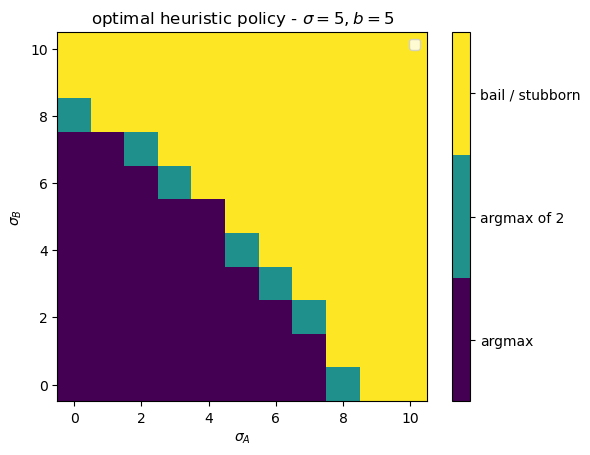

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots()
#pivot = df.pivot(index='sigma1', columns='sigma2', values='idx')
#ax.grid(df, annot = True, fmt='.1f', cmap='viridis')
cmap = colors.ListedColormap(['white', 'yellow', 'green'])
bounds=[-0.5,0.5,1.5, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N)
img = plt.imshow(pivot)
ax.invert_yaxis()
cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 1,2])
cbar.ax.set_yticklabels(['argmax', 'argmax of 2', 'bail / stubborn']) 
plt.title("optimal heuristic policy - $\sigma=5,b=5$")
plt.xlabel("$\sigma_A$")
plt.ylabel("$\sigma_B$")
plt.legend()
plt.savefig('opt_policy.png')



In [ ]:
sigma12_list = np.linspace(0, 10, 100)

for sigma12 in sigma12_list:
    for bail in bail_list:
        val = argmax_val(sigma, sigma12, sigma12, bail_payoff = bail)

In [ ]:
mean_payoffs = [5., 5., 5.]
bail_payoff = 5 # this can change



# fix sigma, create dataframe with columns sigma1, sigma2, value
sigma_list = [3, 4,5]
bail_list = [5]
sigma1_list = np.linspace(0, 10, 11)
sigma2_list = np.linspace(0, 10, 11)

for sigma in sigma_list:
    for bail in bail_list:
        df = pd.DataFrame(columns = ['sigma1', 'sigma2', 'value'])
        for sigma1 in sigma1_list:
            for sigma2 in sigma2_list:
                value = argmax_of_2_val(sigma, sigma1, sigma2, bail_payoff = bail)
                entry = pd.DataFrame.from_dict({'sigma1': [sigma1], 
                'sigma2': [sigma2], 'value':[value]})        
                df = pd.concat([df, entry], ignore_index = True)

        fig, ax = plt.subplots()
        pivot = df.pivot(index='sigma1', columns='sigma2', values='value')
        ax = sns.heatmap(pivot, annot = True, fmt='.1f', cmap='viridis')
        ax.invert_yaxis()
        plt.title("argmax of 2 learner value; bail="+str(bail)+" ; $\sigma$="+str(sigma))
        plt.xlabel("$\sigma_A$")
        plt.ylabel("$\sigma_B$")
        plt.savefig('heatmap2/argmax_'+ str(sigma) + '_' + str(bail) +'.png')